# SIR Epidemic Model

A popular model to study epidemic dynamics is the so called **SIR** model where
we have three different populations but the total number of individuals remains
always the same.

- **Susceptible**: individual that can be infected.
- **Infected**: individual that has been infected and that can infect
  susceptible individuals
- **Recovered**: individual who passed the infection phase and cannot infect
  other individuals any more

A few assumptions of this models are that, as said, the population size is
constant and also normalized to 1. There are no births, deaths, migration etc.

## Discrete Model

First we want to build a discrete model by setting a system of recurrence 
relations. Assuming that $N = S + I + R$ is the total number of individuals,
the system of recurrences will be

$$
\begin{cases}
S_{t+1} = S_t - \beta \frac{S_t I_t}{N} \\
I_{t+1} = I_t + \beta \frac{S_t I_t}{N} - \gamma I_t \\
R_{t+1} = R_t + \gamma I_t
\end{cases}
$$

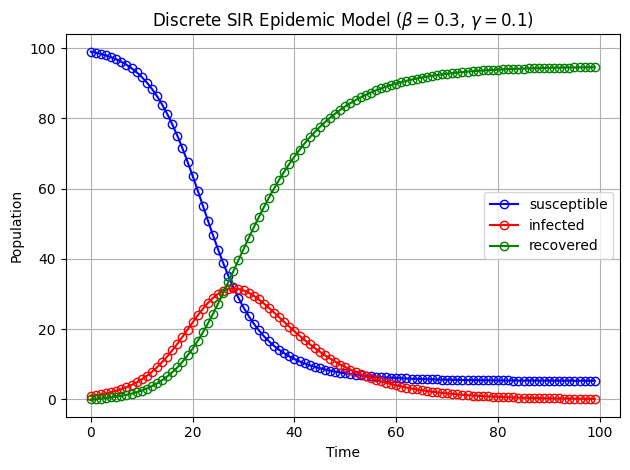

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cmcs.recurrence import Recurrence


def d_sir(y0, beta, gamma):
    s0, i0, r0 = y0
    n = s0 + i0 + r0
    new_infections = beta * s0 * i0 / n
    new_recoveries = gamma * i0

    s = s0 - new_infections
    i = i0 + new_infections - new_recoveries
    r = r0 + new_recoveries

    return s, i, r


beta = 0.3  # infection rate
gamma = 0.1  # recovery rate

y0 = np.array([99, 1, 0])
rec = Recurrence(d_sir, beta, gamma)
time = np.arange(0, 100, 1)
s, i, r = rec.run(y0, time)

plt.title(rf"Discrete SIR Epidemic Model ($\beta={beta}$, $\gamma={gamma}$)")
plt.plot(time, s, "bo-", mfc="none", label="susceptible")
plt.plot(time, i, "ro-", mfc="none", label="infected")
plt.plot(time, r, "go-", mfc="none", label="recovered")
plt.xlabel("Time")
plt.ylabel("Population")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


## Continuous Model

For the continuous model we have the following system of ODEs:

$$
\begin{cases}
\dot{S} = -\beta S I \\
\dot{I} = \beta S I - \gamma I \\
\dot{R} = \gamma I
\end{cases}
$$

where $\beta$ is infection coefficient and $\gamma$ is the recovery coefficient.

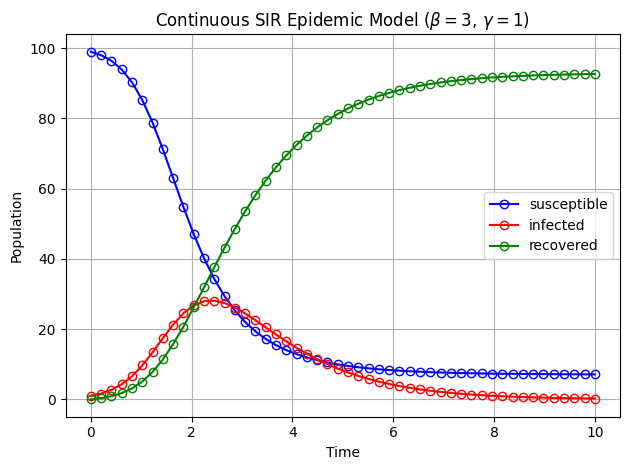

In [8]:
import numpy as np
from cmcs.ode import euler


def c_sir(y, t, beta, gamma):
    s, i, r = y
    n = s + i + r
    dsdt = -beta * s * i / n
    didt = beta * s * i / n - gamma * i
    drdt = gamma * i
    return dsdt, didt, drdt


beta = 3  # infection rate
gamma = 1  # recovery rate

y0 = np.array([99, 1, 0])
time = np.linspace(0, 10, 50)
sol = euler(c_sir, y0, (beta, gamma), time)

plt.title(rf"Continuous SIR Epidemic Model ($\beta={beta}$, $\gamma={gamma}$)")
plt.plot(time, sol[0], "bo-", mfc="none", label="susceptible")
plt.plot(time, sol[1], "ro-", mfc="none", label="infected")
plt.plot(time, sol[2], "go-", mfc="none", label="recovered")
plt.xlabel("Time")
plt.ylabel("Population")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


## Chemical Reactions

Let's now convert the system of differential equations in a set of chemical
reactions, from which we obtain

$$
\begin{align*}
S + I & \xrightarrow{\beta} 2I \\
I &	\xrightarrow{\gamma} R
\end{align*}
$$

in order to perform also some stochastic simulation with the Gillespie's
algorithm.

The first value we need is the number of distinct molecular reactant
combinations
